**Goal**:

To write a ML program that can predict the closing price from the previous Open, Close, High and Low data. Often times than not, it is important to keep a track of prediction error along with size of input data. This is also incorporated in the code.

First import libraries required for the Machine Learning Algorithms.

In [1]:
from pandas_datareader import data as web
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import RandomizedSearchCV as rcv
from sklearn.pipeline import Pipeline 
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from IPython import get_ipython
from IPython.display import Math
from IPython.display import Latex
#This line just helps to remove the scrolling problems
%matplotlib inline

Machine Learning algorithms require huge amounts of data to train and for testing. The Data used here is taken from Yahoo, using the data reader function from Pandas library. Other sources could have been used instead of Yahoo with the same function.

In [2]:
df = web.get_data_yahoo('SPY',start= '2010-01-01', end='2017-05-01')
df=df[['Open','High','Low','Close']]
df

,Open,High,Low,Close
Date,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002
2010-01-05,113.260002,113.680000,112.849998,113.629997
2010-01-06,113.519997,113.989998,113.430000,113.709999
2010-01-07,113.500000,114.330002,113.180000,114.190002
2010-01-08,113.889999,114.620003,113.660004,114.570000
2010-01-11,115.080002,115.129997,114.239998,114.730003
2010-01-12,113.970001,114.209999,113.220001,113.660004
2010-01-13,113.949997,114.940002,113.370003,114.620003
2010-01-14,114.489998,115.139999,114.419998,114.930000


The data we got aboe is for the SPDR ETF linked to S&P 500. These can be used to study the performance of S&P 500 index.
In the function we specify start date and the end date for the data of interest. Once we got this data we look at it and can decide that columns such as Volume and adjusted Close are not needed, hence we only keep columns of interest in the data frame 'df'.

As the original goal was the make predictions from the past data, the below code makes new columns with each row shifted by 1, which is essentially a days difference.

In [3]:
df['open']=df['Open'].shift(1)
df['high']=df['High'].shift(1)
df['low']=df['Low'].shift(1)
df['close']=df['Close'].shift(1)


# **Hyper-parameters**

There are few parameters which the Machine learning algorithm can't learn and these need to be decided by the user, such as the acceptable error margin, the learning rate, etc. It is genereally recommended that the user iterate over various values and see which works best. These are used to determine the best function and parameters.

The **LASSO**(least absolute shrinkage and selection operator) regression used below uses L1 norm for regularization. Genreally these type of models are used to predict continous data. Using this is benificial when using feature selection . It is capable of reducing the coefficient values to zero. The **SimpleImputer** function will replace the missing values with the values specified by the strategy, mean in this case. The **Steps** is just a set of functions we want to apply and pass it to the **Pipeline** function, we use the pipeline function because it is more efficient. As we are trying to get values for the hyper parameters, the **paramters** variable is used to for the possible values we check over for the hyperparameters. Hence there the parameter for lasso are passed here.

Lasso was initially used for LSM, but LASSO regularization can be extended to various other models such as generalized linear models, generalized estimating equations, proportional hazards models, and M-estimators. Lasso’s ability to perform subset selection relies on the form of the constraint and has a variety of interpretations including in terms of geometry, Bayesian statistics, and convex analysis. 

$$\frac{1}{N}\sum f(x_i,y_i,\alpha,\beta)$$
The lasso regularized version of the estimator will be the solution to 
$$min_{\alpha,\beta}\frac{1}{N}\sum f(x_i,y_i,\alpha,\beta)$$ subject to$$||\beta||_1\leq t$$
Even though this function is not differentiable, things are done to make it efficient. 

Finally, the randomized search function is used to perform cross-validation.
Here 5 fold cross validation is used. K-fold cross validation simply partitions the data into k equal part. Out of the K, the model is trained on k-1 part and tested on the reamining part. This is done k time, different part is kept as the testing set everytime. This combines meansures we choose for learning, an average of sorts to derive a more accurate model. Based on the fit parameter we decide the best features. 

In [4]:
imp= SimpleImputer(missing_values=np.nan,strategy='mean')
steps=[('simpleimputation',imp),('scaler', StandardScaler()),('lasso',Lasso())]
pipeline= Pipeline(steps)
parameters={'lasso__alpha':np.arange(0.0001,10,0.0001),'lasso__max_iter':np.random.uniform(100,100000,4)}
#if the iid= True was absent we would get many warning, about changes made. 
reg=rcv(pipeline,parameters,iid=True,cv=5)

**Splitting the data into test and train sets**

We have already made columns with a days lag. We will split the data such that we only use these for prediction and set the target as the acutal closing value for the day. 
Here no additional feature are constructed using any polynomial function to keep things simple, avoid more analysis and justification. But doing it will not be difficult as it can be achieved by using the **PolynomialFeature()** function from the preprocessing package of scikit learn.

Remember we are using the error to measure the performance of the model, we will store the average prediction error corresponding to the index of size used.

In [5]:
avg_err={}

X=df[['open','high','low','close']]
y =df[['Close']]

**Getting the best-fit parameters to create a new function**

Here the sample size over which the model is trained in increased from 50% to 95% in incerments of 3%. It is done to measure the performace of the regression function over varying data. An interesting case will be increasing the input data, will reduce the error. 

Let me explain what I did in a few steps. First, I created a set of periodic numbers ‘t’ starting from 50 to 97, in steps of 3. The purpose of these numbers is to choose the percentage size of the dataset that will be used as train data set. Second, for a given value of ‘t’ I split the length of the data set to the nearest integer corresponding to this percentage. Then I divided the total data into train data, which includes the data from the beginning till the split, and test data, which includes the data from the split till the end. The reason for adopting this approach and not using the random split is to maintain the continuity of the time series.

After this, we pull the best parameters that generated the lowest cross-validation error and then use these parameters to create a new reg1 function which will be a simple Lasso regression fit with the best parameters. 

In [6]:
for t in np.arange(50,97,3):
    split= int(t*len(X)/100)
    reg.fit(X[:split],y[:split])
    best_alpha=reg.best_params_['lasso__alpha']
    best_iter=reg.best_params_['lasso__max_iter']
    reg1= Lasso(alpha=best_alpha,max_iter=best_iter)
    X=imp.fit_transform(X,y)
    reg1.fit(X[:split],y[:split])

    
    df['P_C_%i'%t]=0
    df.iloc[split:,df.columns.get_loc('P_C_%i'%t)]=reg1.predict(X[split:])
    df['Error_%i'%t]= np.abs(df['P_C_%i'%t]-df['Close'])

    e =np.mean(df['Error_%i'%t][split:])
    avg_err[t]=e
#    print(t)



**Making the predictions and checking the performance**

Initially we have divided the data into training and test. As we have finished the training along with calculating the error for different training size, we try to predict. To do this we pass on test X, containing data from split to end, to the regression function using the **predict()** function. We also want to see how well the function has performed, so let us save these values in a new column. 

The object of interest is the absolute difference between the prediction and the actual values. So take the mean of the absolute error values, which are saved in the dictionary created earlier.


Now it’s time to plot and see what we got. 
I created a new Range value to hold the average daily trading range of the data. It is a metric that I would like to compare with when I am making a prediction. The logic behind this comparison is that if my prediction error is more than the day’s range then it is likely that it will not be useful. I might as well use the previous day’s High or Low as the prediction, which will turn out be more accurate. Please note I have used the split value outside the loop. This implies that the average range of the day that you see here is relevant to the last iteration.



Average Range of the Day 1.38462403000042


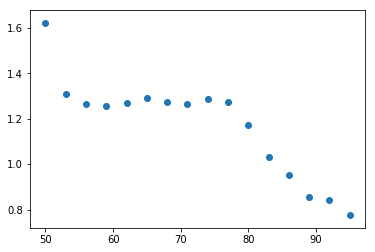

In [7]:
Range =df['high'][split:]-df['low'][split:]
plt.scatter(avg_err.keys(),avg_err.values())
print('\nAverage Range of the Day', np.average(Range))

What conclusions can be drawn from the above plot? A few question that can be tackled are:-

    Is the model over-fitting?
    The performance of the data improved remarkably as the train data set size increased. Does this mean if we give more data the error will reduce further?
    Is there an inherent trend in the market, allowing us to make better predictions as the data set size increases?
    Last but the best question How will we use these predictions to create a trading strategy?


**Overfitting Test**


Average Range of the Day: 1.38462403000042


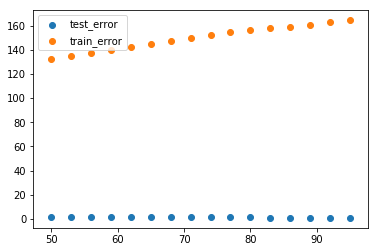

In [8]:
df = web.get_data_yahoo('SPY',start= '2010-01-01', end='2017-05-01')
df=df[['Open','High','Low','Close']]

df['open']=df['Open'].shift(1)
df['high']=df['High'].shift(1)
df['low']=df['Low'].shift(1)
df['close']=df['Close'].shift(1)

imp= SimpleImputer(missing_values=np.nan,strategy='mean')
steps=[('simpleimputation',imp),('scaler', StandardScaler()),('lasso',Lasso())]
pipeline= Pipeline(steps)
parameters={'lasso__alpha':np.arange(0.0001,10,0.0001),'lasso__max_iter':np.random.uniform(100,100000,4)}
reg=rcv(pipeline,parameters,iid=True,cv=5)

avg_err={}
avg_train_err={}

X=df[['open','high','low','close']]
y =df[['Close']]

for t in np.arange(50,97,3):
    get_ipython().magic('reset_selective -f reg1')
    split= int(t*len(X)/100)
    reg.fit(X[:split],y[:split])
    best_alpha=reg.best_params_['lasso__alpha']
    best_iter=reg.best_params_['lasso__max_iter']
    reg1= Lasso(alpha=best_alpha,max_iter=best_iter)
    X=imp.fit_transform(X,y)
    reg1.fit(X[:split],y[:split])
    
    df['P_C_%i'%t]=0
    df.iloc[split:,df.columns.get_loc('P_C_%i'%t)]=reg1.predict(X[split:])
    df['Error_%i'%t]= np.abs(df['P_C_%i'%t]-df['Close'])

    e =np.mean(df['Error_%i'%t][split:])
    train_e=np.mean(df['Error_%i'%t][:split])
    avg_train_err[t]=train_e
    avg_err[t]=e
    
Range =df['high'][split:]-df['low'][split:]
plt.scatter(list(avg_err.keys()),list(avg_err.values()), label='test_error')
plt.scatter(list(avg_train_err.keys()),list(avg_train_err.values()),label='train_error')
plt.legend(loc='best')
print ('\nAverage Range of the Day:',np.average(Range))

The algorithm is doing better in the test data compared to the train data. This observation in itself is a red flag. There are a few reasons why our test data error could be better than the train data error:

    If the train data had a greater volatility (Daily range) compared to the test set, then the prediction would also exhibit greater volatility.
    If there was an inherent trend in the market that helped the algo make better predictions.

Now, let us check which of these cases is true. If the range of the test data was less than the train data, then the error should have decreased after passing more than 80% of the data as a train set, but it increases.

Next, to check if there was a trend, let us pass more data from a different time period. 


Average Range of the Day: 3.8757252489399705


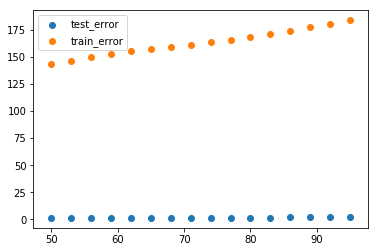

In [9]:
df = web.get_data_yahoo('SPY',start= '2010-01-01', end='2019-04-01')
df=df[['Open','High','Low','Close']]

df['open']=df['Open'].shift(1)
df['high']=df['High'].shift(1)
df['low']=df['Low'].shift(1)
df['close']=df['Close'].shift(1)

imp= SimpleImputer(missing_values=np.nan,strategy='mean')
steps=[('simpleimputation',imp),('scaler', StandardScaler()),('lasso',Lasso())]
pipeline= Pipeline(steps)
parameters={'lasso__alpha':np.arange(0.0001,10,0.0001),'lasso__max_iter':np.random.uniform(100,100000,4)}
reg=rcv(pipeline,parameters,iid=True,cv=5)

avg_err={}
avg_train_err={}

X=df[['open','high','low','close']]
y =df[['Close']]

for t in np.arange(50,97,3):
#    get_ipython().magic('reset_selective -f reg1')
    split= int(t*len(X)/100)
    reg.fit(X[:split],y[:split])
    best_alpha=reg.best_params_['lasso__alpha']
    best_iter=reg.best_params_['lasso__max_iter']
    reg1= Lasso(alpha=best_alpha,max_iter=best_iter)
    X=imp.fit_transform(X,y)
    reg1.fit(X[:split],y[:split])
    
    df['P_C_%i'%t]=0
    df.iloc[split:,df.columns.get_loc('P_C_%i'%t)]=reg1.predict(X[split:])
    df['Error_%i'%t]= np.abs(df['P_C_%i'%t]-df['Close'])

    e =np.mean(df['Error_%i'%t][split:])
    train_e=np.mean(df['Error_%i'%t][:split])
    avg_train_err[t]=train_e
    avg_err[t]=e
    
Range =df['high'][split:]-df['low'][split:]
plt.scatter(list(avg_err.keys()),list(avg_err.values()), label='test_error')
plt.scatter(list(avg_train_err.keys()),list(avg_train_err.values()),label='train_error')
plt.legend(loc='best')
print ('\nAverage Range of the Day:',np.average(Range))

So giving more data to the algorithm made it perform worse instead of imporving the performance. It makes sense because we expect the inherent trend to play a major role on prediction and performance of test data. In the first part of the code it lead to better results than we should have even expected. So, the main reason why our algo was doing so well was the test data was sticking to the main pattern observed in the train data.

If we conclude that our machine learning algorithm can realize the trend on the underlying in the market and somehow use it in prediction then the predictions should improve further! Formall the following question can be asked.

    Is the algorithm capable for determining the trend for a particular underlying in the market?.
    Is it possible to make the model more flexible so that training for different scenarios is possible?

The answer to both the questions is a YES!

Currently our model is restricted because we are using techniques from supervised learning. We can let the model divide the market into different regimes. The nature of the underlying is different in each of the regimes hence we should use these signals to trim the data and train different algorithms. To achieve this, I choose to use an unsupervised machine learning algorithm.

Now I will implement an algorithm that can detect the inherent trend in the market without explicitly training for it.

Similar to earlier, fetch the data from yahoo using the data reader function. Again the ones which are important to use are the OHLC values and then apply a days lag.

Then drop all the NaN. 

Then an unsupervised machine learning algorithm called "Mixture of Gaussian" model is used, the model is imported from sklearn.

The code below uses the unsupervised-algo to divide the values into 4 clusters, based on the criterion of its own choosing. We have not provided any train dataset with labels. Fit the data and predict the clusters. As we would like to plot this information later on, store these cluster predictions in a new variable called regime. 

Now let us calculate the returns of the day. 

Then, create a dataframe called Regimes which will have the OHLC and Return values along with the corresponding cluster classification. 

After all the prediction is over, the individual clusters are studied, we calculate the mean and the standard devation, store these in a list which is used for plotting to see how well the algo has classified. 

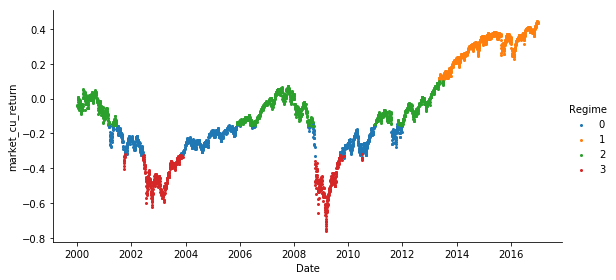

Mean for regime 0:  115.4413547444974
Co-Variancefor regime 0:  29.91779493382285
Mean for regime 1:  197.24670436694703
Co-Variancefor regime 1:  251.15539226698058
Mean for regime 2:  138.70996229555712
Co-Variancefor regime 2:  75.02016690708354
Mean for regime 3:  92.01809640416731
Co-Variancefor regime 3:  57.47965548073364


In [10]:
from pandas_datareader import data as web
import numpy as np
import pandas as pd
from sklearn import mixture as mix
import seaborn as sns 
import matplotlib.pyplot as plt

df= web.get_data_yahoo('SPY',start= '2000-01-01', end='2017-01-01')
df=df[['Open','High','Low','Close']]
df['open']=df['Open'].shift(1)
df['high']=df['High'].shift(1)
df['low']=df['Low'].shift(1)
df['close']=df['Close'].shift(1)

df=df[['open','high','low','close']]

df=df.dropna()

unsup = mix.GaussianMixture(n_components=4, 
                            covariance_type="spherical", 
                            n_init=100, 
                            random_state=42)

unsup.fit(np.reshape(df,(-1,df.shape[1])))
regime = unsup.predict(np.reshape(df,(-1,df.shape[1])))

df['Return']= np.log(df['close']/df['close'].shift(1))

Regimes=pd.DataFrame(regime,columns=['Regime'],index=df.index)\
                     .join(df, how='inner')\
                          .assign(market_cu_return=df.Return.cumsum())\
                                 .reset_index(drop=False)\
                                             .rename(columns={'index':'Date'})

order=[0,1,2,3]
fig = sns.FacetGrid(data=Regimes,hue='Regime',hue_order=order,aspect=2,height= 4)
fig.map(plt.scatter,'Date','market_cu_return', s=4).add_legend()
plt.show()

for i in order:
    print('Mean for regime %i: '%i,unsup.means_[i][0])
    print('Co-Variancefor regime %i: '%i,(unsup.covariances_[i]))
    

This graph looks pretty good to me. Without actually looking at the factors based on which the classification was done, we can conclude a few things just by looking at the chart.

    The blue zone is the low volatility or the sideways zone
    The red zone is high volatility zone or panic zone.
    The yellow zone is a breakout zone.
    The green zone is the low volatility zone.

The data can be inferred as follows:

    Regime 0: Low mean and High variance.
    Regime 1: High mean and High variance.
    Regime 2: High mean and Low variance.
    Regime 3: Low mean and Low variance.

So currently we know how to implement a machine learning model, few things to look out for, how to detect the treands in the market. Now we need to somehow implment this in a strategy.

 ## Implementing a strategy
 
 Import libraries needed and the data. Also make use the Mixture of Gaussian algorithm to separate into clusters and store information about the clusters/regimes.
 
 After this, I created various technical indicators such as, 
  RSI  Relative Strength Index
  
  SMA  Mean of last n days
  
  ADX  Average Directional Movement Index, An indicator of trend strength in a series of prices of a financial instrument.
  
  Correlation correlation of last n days
  
  Parabolic SAR, The parabolic SAR attempts help traders by telling which direction the assest is moving, as well as providing entry and exit points.
  
  and the Return of the past day on an Open to Open basis. 

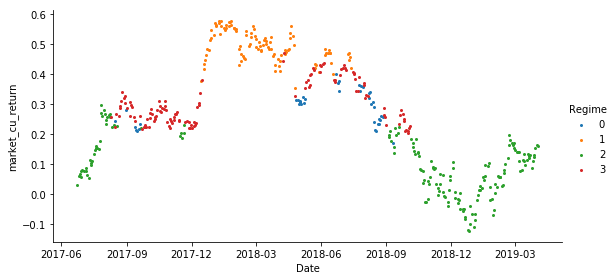

('Mean for regime 0: ', 0.21389296443143072)
('Co-Variance for regime 0: ', 0.21019228822684721)
('Mean for regime 1: ', 1.3873458168973583)
('Co-Variance for regime 1: ', 0.49819333881754524)
('Mean for regime 2: ', -1.201519625548739)
('Co-Variance for regime 2: ', 0.57145170751809471)
('Mean for regime 3: ', 0.3874442181723004)
('Co-Variance for regime 3: ', 0.27080146230650637)


In [19]:
from pandas_datareader import data as web
import numpy as np
import pandas as pd
from sklearn import mixture as mix
import seaborn as sns 
import matplotlib.pyplot as plt
import talib as ta
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

df= web.get_data_yahoo('FCX',start= '2010-01-01', end='2019-04-01')
df=df[['Open','High','Low','Close']]

n = 10
t = 0.8
split =int(t*len(df))

df['high']=df['High'].shift(1)
df['low']=df['Low'].shift(1)
df['close']=df['Close'].shift(1)
df['RSI']=ta.RSI(np.array(df['close']), timeperiod=n)
df['SMA']= df['close'].rolling(window=n).mean()
df['Corr']= df['SMA'].rolling(window=n).corr(df['close'])
df['SAR']=ta.SAR(np.array(df['high']),np.array(df['low']),\
                  0.2,0.2)
df['ADX']=ta.ADX(np.array(df['high']),np.array(df['low']),\
                  np.array(df['close']), timeperiod =n)
df['Corr'][df.Corr>1]=1
df['Corr'][df.Corr<-1]=-1 
df['Return']= np.log(df['Open']/df['Open'].shift(1))


df=df.dropna()



ss= StandardScaler()
unsup = mix.GaussianMixture(n_components=4, 
                            covariance_type="spherical", 
                            n_init=100, 
                            random_state=42)
df=df.drop(['High','Low','Close'],axis=1)
unsup.fit(np.reshape(ss.fit_transform(df[:split]),(-1,df.shape[1])))
regime = unsup.predict(np.reshape(ss.fit_transform(df[split:]),\
                                                   (-1,df.shape[1])))

Regimes=pd.DataFrame(regime,columns=['Regime'],index=df[split:].index)\
                     .join(df[split:], how='inner')\
                          .assign(market_cu_return=df[split:]\
                                  .Return.cumsum())\
                                  .reset_index(drop=False)\
                                  .rename(columns={'index':'Date'})

order=[0,1,2,3]
fig = sns.FacetGrid(data=Regimes,hue='Regime',hue_order=order,aspect=2,height= 4)
fig.map(plt.scatter,'Date','market_cu_return', s=4).add_legend()
plt.show()

for i in order:
    print('Mean for regime %i: '%i,unsup.means_[i][0])
    print('Co-Variance for regime %i: '%i,(unsup.covariances_[i]))


Next, I scaled the Regimes data frame, excluding the Date and Regimes columns. By doing so, I will not be losing any features but the data will be scaled and ready for training the support vector classifier algorithm. Next, I created a signal column which would act as the prediction values. The algorithm would train on the features’ set to predict this signal. 

In [22]:
ss1 =StandardScaler()
columns =Regimes.columns.drop(['Regime','Date'])
Regimes[columns]= ss1.fit_transform(Regimes[columns])
Regimes['Signal']=0
Regimes.loc[Regimes['Return']>0,'Signal']=1
Regimes.loc[Regimes['Return']<0,'Signal']=-1
Regimes['return'] = Regimes['Return'].shift(1)
Regimes=Regimes.dropna()



/home/firefistace/anaconda3/lib/python2.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/firefistace/anaconda3/lib/python2.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Declared a SVM classifier/object. For this, the SVC model is used. The support vector classifier is not optimized hyper parameters.

In [23]:
cls= SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


Next, split the test data into train and test data. Use train data to train our SVC. To create the train data I dropped the columns that are not a part of the feature set:

‘Signal’,’Return’,’market_cu_return’,’Date’

Then I fit the X and y data sets to the algorithm to train it on. 

In [24]:
split2= int(.8*len(Regimes))

X = Regimes.drop(['Signal','Return','market_cu_return','Date'], axis=1)
y= Regimes['Signal']

cls.fit(X[:split2],y[:split2])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Next, I calculated the test set size and indexed the predictions accordingly to the data frame df.

The reason for doing this is that the original return values of ‘SPY’ are stored in df, while those in Regimes is scaled hence, won’t be useful for taking a cumulative sum to check for the performance. 

I saved the predictions made by the SVC in a column named Pred_Signal.

Then, based on these signals I calculated the returns of the strategy by multiplying signal at the beginning of the day with the return at the opening ( because our returns are from open to open) of the next day. Finally, I calculated the cumulative strategy returns and the cumulative market returns and saved them in df. Then, I calculated the sharpe ratio to measure the performance. To get a clear understanding of this metric I plotted the performance to measure it.

Date
2018-11-21   -1
2018-11-23   -1
2018-11-26   -1
2018-11-27   -1
2018-11-28   -1
2018-11-29   -1
2018-11-30   -1
2018-12-03    1
2018-12-04   -1
2018-12-06   -1
2018-12-07   -1
2018-12-10   -1
2018-12-11   -1
2018-12-12   -1
2018-12-13   -1
2018-12-14   -1
2018-12-17   -1
2018-12-18   -1
2018-12-19   -1
2018-12-20   -1
2018-12-21   -1
2018-12-24   -1
2018-12-26   -1
2018-12-27   -1
2018-12-28   -1
2018-12-31   -1
2019-01-02   -1
2019-01-03   -1
2019-01-04   -1
2019-01-07   -1
             ..
2019-02-20    1
2019-02-21    1
2019-02-22    1
2019-02-25    1
2019-02-26    1
2019-02-27    1
2019-02-28    1
2019-03-01    1
2019-03-04    1
2019-03-05    1
2019-03-06    1
2019-03-07   -1
2019-03-08   -1
2019-03-11   -1
2019-03-12   -1
2019-03-13    1
2019-03-14    1
2019-03-15   -1
2019-03-18   -1
2019-03-19    1
2019-03-20   -1
2019-03-21    1
2019-03-22    1
2019-03-25   -1
2019-03-26   -1
2019-03-27   -1
2019-03-28   -1
2019-03-29    1
2019-04-01    1
2019-04-02    1
Name: Pred_Signal, 

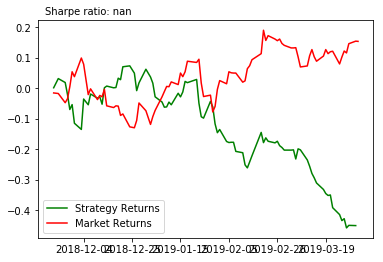

In [25]:
p_data=len(X)-split2

df['Pred_Signal']=0
df.iloc[-p_data:,df.columns.get_loc('Pred_Signal')]=cls.predict(X[split2:])

print(df['Pred_Signal'][-p_data:])

df['str_ret'] =df['Pred_Signal']*df['Return'].shift(-1)

df['strategy_cu_return']=0.
df['market_cu_return']=0.
df.iloc[-p_data:,df.columns.get_loc('strategy_cu_return')] \
       = np.cumsum(df['str_ret'][-p_data:])
df.iloc[-p_data:,df.columns.get_loc('market_cu_return')] \
       = np.cumsum(df['Return'][-p_data:])
Sharpe = (df['strategy_cu_return'][-1]-df['market_cu_return'][-1])\
           /np.nanstd(df['strategy_cu_return'][-p_data:])

plt.plot(df['strategy_cu_return'][-p_data:],color='g',label='Strategy Returns')
plt.plot(df['market_cu_return'][-p_data:],color='r',label='Market Returns')
plt.figtext(0.14,0.9,s='Sharpe ratio: %.2f'%Sharpe)
plt.legend(loc='best')
plt.show()

While the performance does not look any good, we can try this model for different types of stock instead of just S&P 500 and we see the results do get better.

This strategy works on some stocks but doesn’t work on others. Few things not considered are:

    No autocorrelation of returns
    No Support Vector hyper parameter optimization
    No error propagation
    No feature selection
